# Most Popular Programming Language

Nothing last forever in this world, programming language is just a little part of the world that affected with this

In this notebook I just want to update the code from this [link](https://www.kaggle.com/japandata509/popular-programming-languages-every-month) by [Kaito](https://www.kaggle.com/japandata509)

His code is build about six months ago, but the dataset had been changing. So let implement it in the new dataset

## Installing Necessary Module

In [1]:
!pip install bar_chart_race # Used for displaying data per month in interactive web video
!pip install ffmpeg # Used for compiling video in Python code

     |████████████████████████████████| 156 kB 1.2 MB/s 
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=b120eaf21c082633da715013ae4fce7ad3d44cc00694e86c70e1cadc38e9c6cd
  Stored in directory: /root/.cache/pip/wheels/64/80/6e/caa3e16deb0267c3cbfd36862058a724144e19fdb9eb03af0f
Successfully built ffmpeg


## Importing Module

In [2]:
from IPython.display import HTML, display
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import bar_chart_race as bcr
import plotly.express as px
import pandas as pd 
import numpy as np
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/most-popular-programming-languages-since-2004/Most Popular Programming Languages from 2004 to 2021 V4.csv


## Import and Exploring Information From the Dataset

In [3]:
df = pd.read_csv('/kaggle/input/most-popular-programming-languages-since-2004/Most Popular Programming Languages from 2004 to 2021 V4.csv')

In [4]:
df.tail()

,Date,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi,Go,Groovy,...,PHP,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic
198,January 2021,0.51,0.63,6.30,6.55,0.35,0.56,0.26,1.33,0.37,...,6.02,30.51,3.85,1.12,1.02,0.71,2.14,1.77,1.19,0.68
199,February 2021,0.50,0.70,6.41,6.66,0.32,0.58,0.25,1.30,0.39,...,6.13,30.24,3.93,1.12,1.10,0.67,1.97,1.75,1.18,0.73
200,March 2021,0.56,0.75,6.63,6.80,0.36,0.56,0.24,1.28,0.40,...,6.12,29.76,3.91,1.16,1.06,0.66,1.77,1.83,1.23,0.67
201,April 2021,0.58,0.77,6.80,6.89,0.36,0.55,0.23,1.36,0.39,...,6.30,29.65,3.99,1.18,1.03,0.67,1.76,1.91,1.25,0.73
202,May 2021,0.61,0.72,6.62,6.90,0.36,0.55,0.24,1.42,0.41,...,6.15,29.90,3.93,1.12,1.13,0.67,1.96,1.89,1.33,0.70


As you can see from the data, we got that the latest data is in May 2021

In [5]:
df.columns

Index(['Date', 'Abap', 'Ada', 'C/C++', 'C#', 'Cobol', 'Dart', 'Delphi', 'Go',
       'Groovy', 'Haskell', 'Java', 'JavaScript', 'Julia', 'Kotlin', 'Lua',
       'Matlab', 'Objective-C', 'Perl', 'PHP', 'Python', 'R', 'Ruby', 'Rust',
       'Scala', 'Swift', 'TypeScript', 'VBA', 'Visual Basic'],
      dtype='object')

From the output above, we see that the zero index is Date, it's not a programming language, so let's turn it into index

In [6]:
df = df.set_index('Date')

In [7]:
df.tail()

,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi,Go,Groovy,Haskell,...,PHP,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic
Date,,,,,,,,,,,,,,,,,,,,,
January 2021,0.51,0.63,6.30,6.55,0.35,0.56,0.26,1.33,0.37,0.27,...,6.02,30.51,3.85,1.12,1.02,0.71,2.14,1.77,1.19,0.68
February 2021,0.50,0.70,6.41,6.66,0.32,0.58,0.25,1.30,0.39,0.29,...,6.13,30.24,3.93,1.12,1.10,0.67,1.97,1.75,1.18,0.73
March 2021,0.56,0.75,6.63,6.80,0.36,0.56,0.24,1.28,0.40,0.25,...,6.12,29.76,3.91,1.16,1.06,0.66,1.77,1.83,1.23,0.67
April 2021,0.58,0.77,6.80,6.89,0.36,0.55,0.23,1.36,0.39,0.22,...,6.30,29.65,3.99,1.18,1.03,0.67,1.76,1.91,1.25,0.73
May 2021,0.61,0.72,6.62,6.90,0.36,0.55,0.24,1.42,0.41,0.21,...,6.15,29.90,3.93,1.12,1.13,0.67,1.96,1.89,1.33,0.70


Right now, the index is become 'Date', because we want to know the most popular programming language, let's check the May row

## Popular Languages (May 2021)

In [8]:
df.tail(1).T.values.flatten()

array([ 0.61,  0.72,  6.62,  6.9 ,  0.36,  0.55,  0.24,  1.42,  0.41,
        0.21, 17.72,  8.31,  0.42,  1.62,  0.49,  1.71,  2.52,  0.4 ,
        6.15, 29.9 ,  3.93,  1.12,  1.13,  0.67,  1.96,  1.89,  1.33,
        0.7 ])

In [9]:
df_popular = pd.DataFrame({'Languages':df.tail(1).T.index, 'Popularity':df.tail(1).T.values.flatten()})

In [10]:
df_popular

,Languages,Popularity
0,Abap,0.61
1,Ada,0.72
2,C/C++,6.62
3,C#,6.90
4,Cobol,0.36
5,Dart,0.55
6,Delphi,0.24
7,Go,1.42
8,Groovy,0.41
9,Haskell,0.21


## Visualizing the Data Into Pie Chart

In [11]:
fig = px.pie(df_popular, values='Popularity', names='Languages',
             title='Programming Languages Score (May 2021)')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## Visualizing in Barh Chart

In [12]:
df_popular_sorted = df_popular.sort_values(by=['Popularity'])

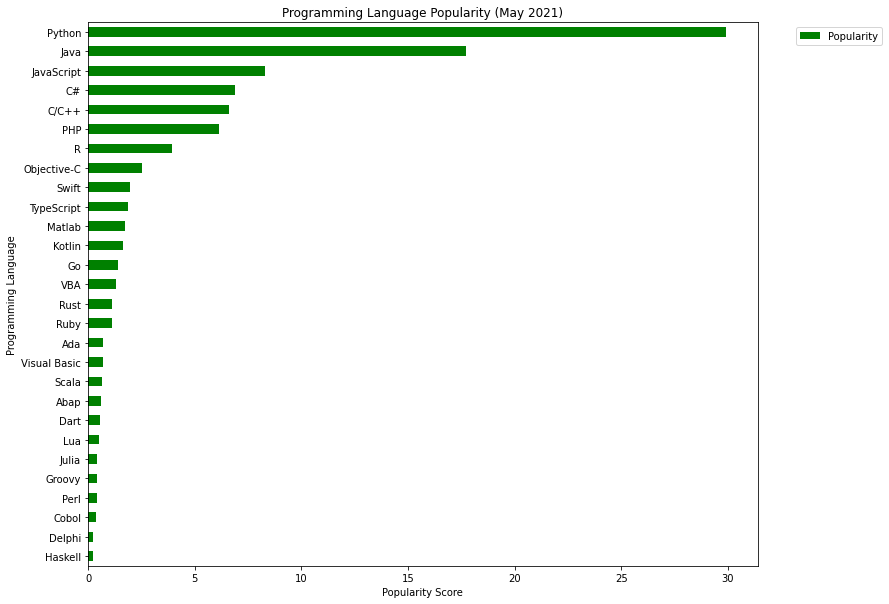

In [13]:
fig, ax = plt.subplots(figsize=(12,10))
df_popular_sorted.plot(x='Languages', y='Popularity', 
                kind='barh', ax=ax, color='green')
plt.xlabel('Popularity Score')
plt.ylabel('Programming Language')
plt.title('Programming Language Popularity (May 2021)')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

## Animation For Most Popular Programming Language From 2004 - 2021

In [14]:
df

,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi,Go,Groovy,Haskell,...,PHP,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic
Date,,,,,,,,,,,,,,,,,,,,,
July 2004,0.34,0.36,10.08,4.71,0.43,0.00,2.82,0.00,0.03,0.22,...,18.75,2.53,0.39,0.33,0.08,0.03,0.00,0.00,1.44,8.56
August 2004,0.36,0.36,9.81,4.99,0.46,0.00,2.67,0.00,0.07,0.20,...,19.26,2.64,0.41,0.40,0.09,0.03,0.00,0.00,1.46,8.57
September 2004,0.41,0.41,9.63,5.06,0.51,0.00,2.65,0.00,0.08,0.21,...,19.49,2.72,0.40,0.41,0.10,0.03,0.00,0.00,1.55,8.41
October 2004,0.40,0.38,9.50,5.31,0.53,0.00,2.77,0.00,0.09,0.20,...,19.34,2.92,0.42,0.46,0.11,0.04,0.00,0.00,1.61,8.49
November 2004,0.38,0.38,9.52,5.24,0.55,0.00,2.76,0.00,0.07,0.24,...,19.43,2.84,0.41,0.45,0.13,0.04,0.00,0.00,1.50,8.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
January 2021,0.51,0.63,6.30,6.55,0.35,0.56,0.26,1.33,0.37,0.27,...,6.02,30.51,3.85,1.12,1.02,0.71,2.14,1.77,1.19,0.68
February 2021,0.50,0.70,6.41,6.66,0.32,0.58,0.25,1.30,0.39,0.29,...,6.13,30.24,3.93,1.12,1.10,0.67,1.97,1.75,1.18,0.73
March 2021,0.56,0.75,6.63,6.80,0.36,0.56,0.24,1.28,0.40,0.25,...,6.12,29.76,3.91,1.16,1.06,0.66,1.77,1.83,1.23,0.67


In [15]:
bcr.bar_chart_race(df=df, n_bars=10, figsize=(6, 6), filter_column_colors=True, title='Top 10 Programming Languages (2004 - 2021)', filename=None)

/opt/conda/lib/python3.7/site-packages/bar_chart_race/_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

/opt/conda/lib/python3.7/site-packages/bar_chart_race/_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator



From the video above, we can can take conclusion that every programming language has it own time. Before 2018, Java is the king and until 2016 PHP is always the queen. After Python come out with his 'hello world' that was very simple. It liberate the market, Java and PHP is becoming downgrade. 

Without loosing attention, we can also see that JavaScript from 2004 until 2018 is mostly stagnan in number 3-6. I believe after Angular and other framework come out, It change the market and turn PHP to be downgrade again. 

In the $10^{th}$ place, we can see since 2019, TypeScript is comeout and it mostly take place from Matlab, but the competition between them is not ending yet. We can't conclude right now, but I believe TypeScript will also get the $5^{th}$ places in less than five years from now. You can display it if you wan in that time.

The conclusion is until May 2021, we got information that the most popular language is

* Python

* Java

* JavaScript

What we can learn from this is this

> Technology is changing everytime, if they can adapt the world, they will dissapear from it ~ [@theDreamer911](https://github.com/theDreamer911) a.k.a [@handhikayp](https://twitter.com/handhikayp)

**Thanks For Reading**

*22 June 2021*
